## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 1us/step


### Find no.of samples are there in training and test datasets

In [3]:
print(x_train.shape)

(60000, 28, 28)


In [4]:
print(x_test.shape)

(10000, 28, 28)


### Find dimensions of an image in the dataset

In [5]:
print("Dimensions for test data are : {0} x {1}".format(x_test.shape[1],x_test.shape[2]))

Dimensions for test data are : 28 x 28


In [6]:
print("Dimensions for Train data are {0} x {1}".format(x_train.shape[1],x_train.shape[2]))

Dimensions for Train data are 28 x 28


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.astype('float32') 
x_train = x_train// 255
x_test = x_test.astype('float32')
x_test = x_test// 255


### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
#Adding depth parameter
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

### Import the necessary layers from keras to build the model

In [0]:
model = tf.keras.models.Sequential()

In [11]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2,  activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

W0818 14:11:39.551144 140095462152064 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
earlyStopingPatience = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32, callbacks=[earlyStopingPatience])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 191us/sample - loss: 1.5589 - acc: 0.4294 - val_loss: 1.4821 - val_acc: 0.4482
Epoch 2/10
60000/60000 [==============================] - 8s 125us/sample - loss: 1.4532 - acc: 0.4618 - val_loss: 1.4521 - val_acc: 0.4640
Epoch 3/10
60000/60000 [==============================] - 7s 124us/sample - loss: 1.4148 - acc: 0.4765 - val_loss: 1.4484 - val_acc: 0.4665
Epoch 4/10
60000/60000 [==============================] - 8s 127us/sample - loss: 1.3823 - acc: 0.4889 - val_loss: 1.4492 - val_acc: 0.4643
Epoch 5/10
60000/60000 [==============================] - 8s 132us/sample - loss: 1.3498 - acc: 0.4986 - val_loss: 1.4595 - val_acc: 0.4627
Epoch 6/10
60000/60000 [==============================] - 8s 126us/sample - loss: 1.3181 - acc: 0.5128 - val_loss: 1.4716 - val_acc: 0.4599
Epoch 7/10
60000/60000 [==============================] - 8s 125us/sample - loss: 1.2874 - acc: 0.5238 - val_

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
model = tf.keras.models.Sequential()

In [0]:
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu')) # 128 neurons relu
model.add(tf.keras.layers.Dense(10, activation='softmax')) # 10 neurons softmax

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 137us/sample - loss: 1.5229 - acc: 0.4430 - val_loss: 1.4553 - val_acc: 0.4647
Epoch 2/10
60000/60000 [==============================] - 8s 135us/sample - loss: 1.4237 - acc: 0.4742 - val_loss: 1.4344 - val_acc: 0.4713
Epoch 3/10
60000/60000 [==============================] - 8s 134us/sample - loss: 1.3827 - acc: 0.4873 - val_loss: 1.4301 - val_acc: 0.4726
Epoch 4/10
60000/60000 [==============================] - 8s 135us/sample - loss: 1.3456 - acc: 0.5016 - val_loss: 1.4433 - val_acc: 0.4679
Epoch 5/10
60000/60000 [==============================] - 8s 135us/sample - loss: 1.3140 - acc: 0.5134 - val_loss: 1.4465 - val_acc: 0.4687
Epoch 6/10
60000/60000 [==============================] - 8s 135us/sample - loss: 1.2813 - acc: 0.5276 - val_loss: 1.4741 - val_acc: 0.4695
Epoch 7/10
60000/60000 [==============================] - 8s 134us/sample - loss: 1.2577 - acc: 0.5357 - val_l

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
datagen = keras.preprocessing.image.ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	horizontal_flip=True, fill_mode="nearest")

In [0]:
generatorTrain = datagen.flow(x_train,y_train, batch_size=64)
generatorTest = datagen.flow(x_test,y_test, batch_size=64)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

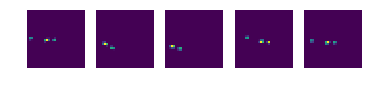

In [22]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [23]:
model.fit_generator(generatorTrain, epochs=10, validation_data=generatorTest)

Epoch 1/10
938/938 [==============================] - 18s 19ms/step - loss: 2.0888 - acc: 0.2270 - val_loss: 2.0199 - val_acc: 0.2565
Epoch 2/10
938/938 [==============================] - 18s 19ms/step - loss: 2.0025 - acc: 0.2598 - val_loss: 1.9878 - val_acc: 0.2680
Epoch 3/10
938/938 [==============================] - 18s 19ms/step - loss: 1.9742 - acc: 0.2675 - val_loss: 1.9573 - val_acc: 0.2744
Epoch 4/10
938/938 [==============================] - 18s 20ms/step - loss: 1.9590 - acc: 0.2740 - val_loss: 1.9486 - val_acc: 0.2792
Epoch 5/10
938/938 [==============================] - 18s 19ms/step - loss: 1.9473 - acc: 0.2775 - val_loss: 1.9434 - val_acc: 0.2702
Epoch 6/10
938/938 [==============================] - 18s 19ms/step - loss: 1.9353 - acc: 0.2805 - val_loss: 1.9339 - val_acc: 0.2818
Epoch 7/10
938/938 [==============================] - 18s 19ms/step - loss: 1.9321 - acc: 0.2814 - val_loss: 1.9209 - val_acc: 0.2887
Epoch 8/10
938/938 [==============================] - 18s 19ms

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

###  Report the final train and validation accuracy

In [25]:
result=model.evaluate(x_test,y_test,verbose=1)

10000/10000 [==============================] - 1s 79us/sample - loss: 1.7365 - acc: 0.3512


In [26]:
print("Model Accuracy is : ",result[1]*100)

Model Accuracy is :  35.120001435279846


In [28]:
print("Model Loss is : ",result[0])

Model Loss is :  1.736462162399292


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import necessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [30]:
(cifar_x_train, cifar_y_train), (cifar_x_test, cifar_y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


In [31]:
print(cifar_x_train.shape)

(50000, 32, 32, 3)


In [32]:
print(cifar_y_train.shape)

(50000, 1)


In [33]:
print(cifar_x_test.shape)

(10000, 32, 32, 3)


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
datagen = keras.preprocessing.image.ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	horizontal_flip=True)

### **Prepare/fit the generator.**

In [0]:
datagen.fit(cifar_x_train)

In [38]:
cifar_x_train.shape

(50000, 32, 32, 3)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

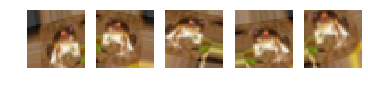

In [39]:
from matplotlib import pyplot as plt
gen = datagen.flow(cifar_x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().astype(np.uint8).squeeze())
    plt.plot()
plt.show()